In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

In [2]:
simple_unique_count = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/sample_unique_count.csv")
prob_df = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/prob_df.csv")
df_token = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/df_token.csv")

In [5]:
simple_unique_count

,token,0,1,2,fre_sum,tn
0,금리/NNG;오르/VV;부작용/NNG,14,10,6,30,1
1,경기/NNG;부양/NNG;금리/NNG;내리/VV,10,8,24,42,1
2,금리/NNG;성장/NNG;둔화/NNG,0,4,1,5,1
3,투자/NNG;반대/NNG,14,11,12,37,1
4,하락/NNG;경제/NNG;침체/NNG,5,7,6,18,1
...,...,...,...,...,...,...
730592,채권/NNG;금리/NNG;하락/NNG;가격/NNG;상승/NNG,8,3,5,16,20
730593,인플레이션/NNG;우려/NNG;금리/NNG;상승/NNG,8,13,1,22,20
730594,금리/NNG;인상/NNG;불안/NNG;크/VV,1,1,0,2,20
730595,펀더멘털/NNG;자신/NNG,5,6,2,13,20


In [12]:
# 20개의 random set에서 각 set별 상위 10개 n-gram token

tn_top10 = [simple_unique_count[simple_unique_count.tn==i].sort_values('fre_sum', ascending=False).head(10) for i in range(1,21)]

In [38]:
tn_top10[19]

,token,0,1,2,fre_sum,tn
711717,안정/NNG,4251,4034,4192,12477,20
700860,성장/NNG,3539,3750,3155,10444,20
726459,금리/NNG;인상/NNG,3306,5243,1592,10141,20
719824,급락/NNG,2862,3225,2928,9015,20
726753,완화/NNG,2560,3255,2707,8522,20
729185,회복/NNG,2648,2897,2954,8499,20
729465,금리/NNG;인하/NNG,1742,1382,4074,7198,20
696680,자신/NNG,2159,2059,1923,6141,20
712069,금리/NNG;오르/VV,1881,2842,1404,6127,20
712025,불확실성/NNG,2082,1948,1786,5816,20


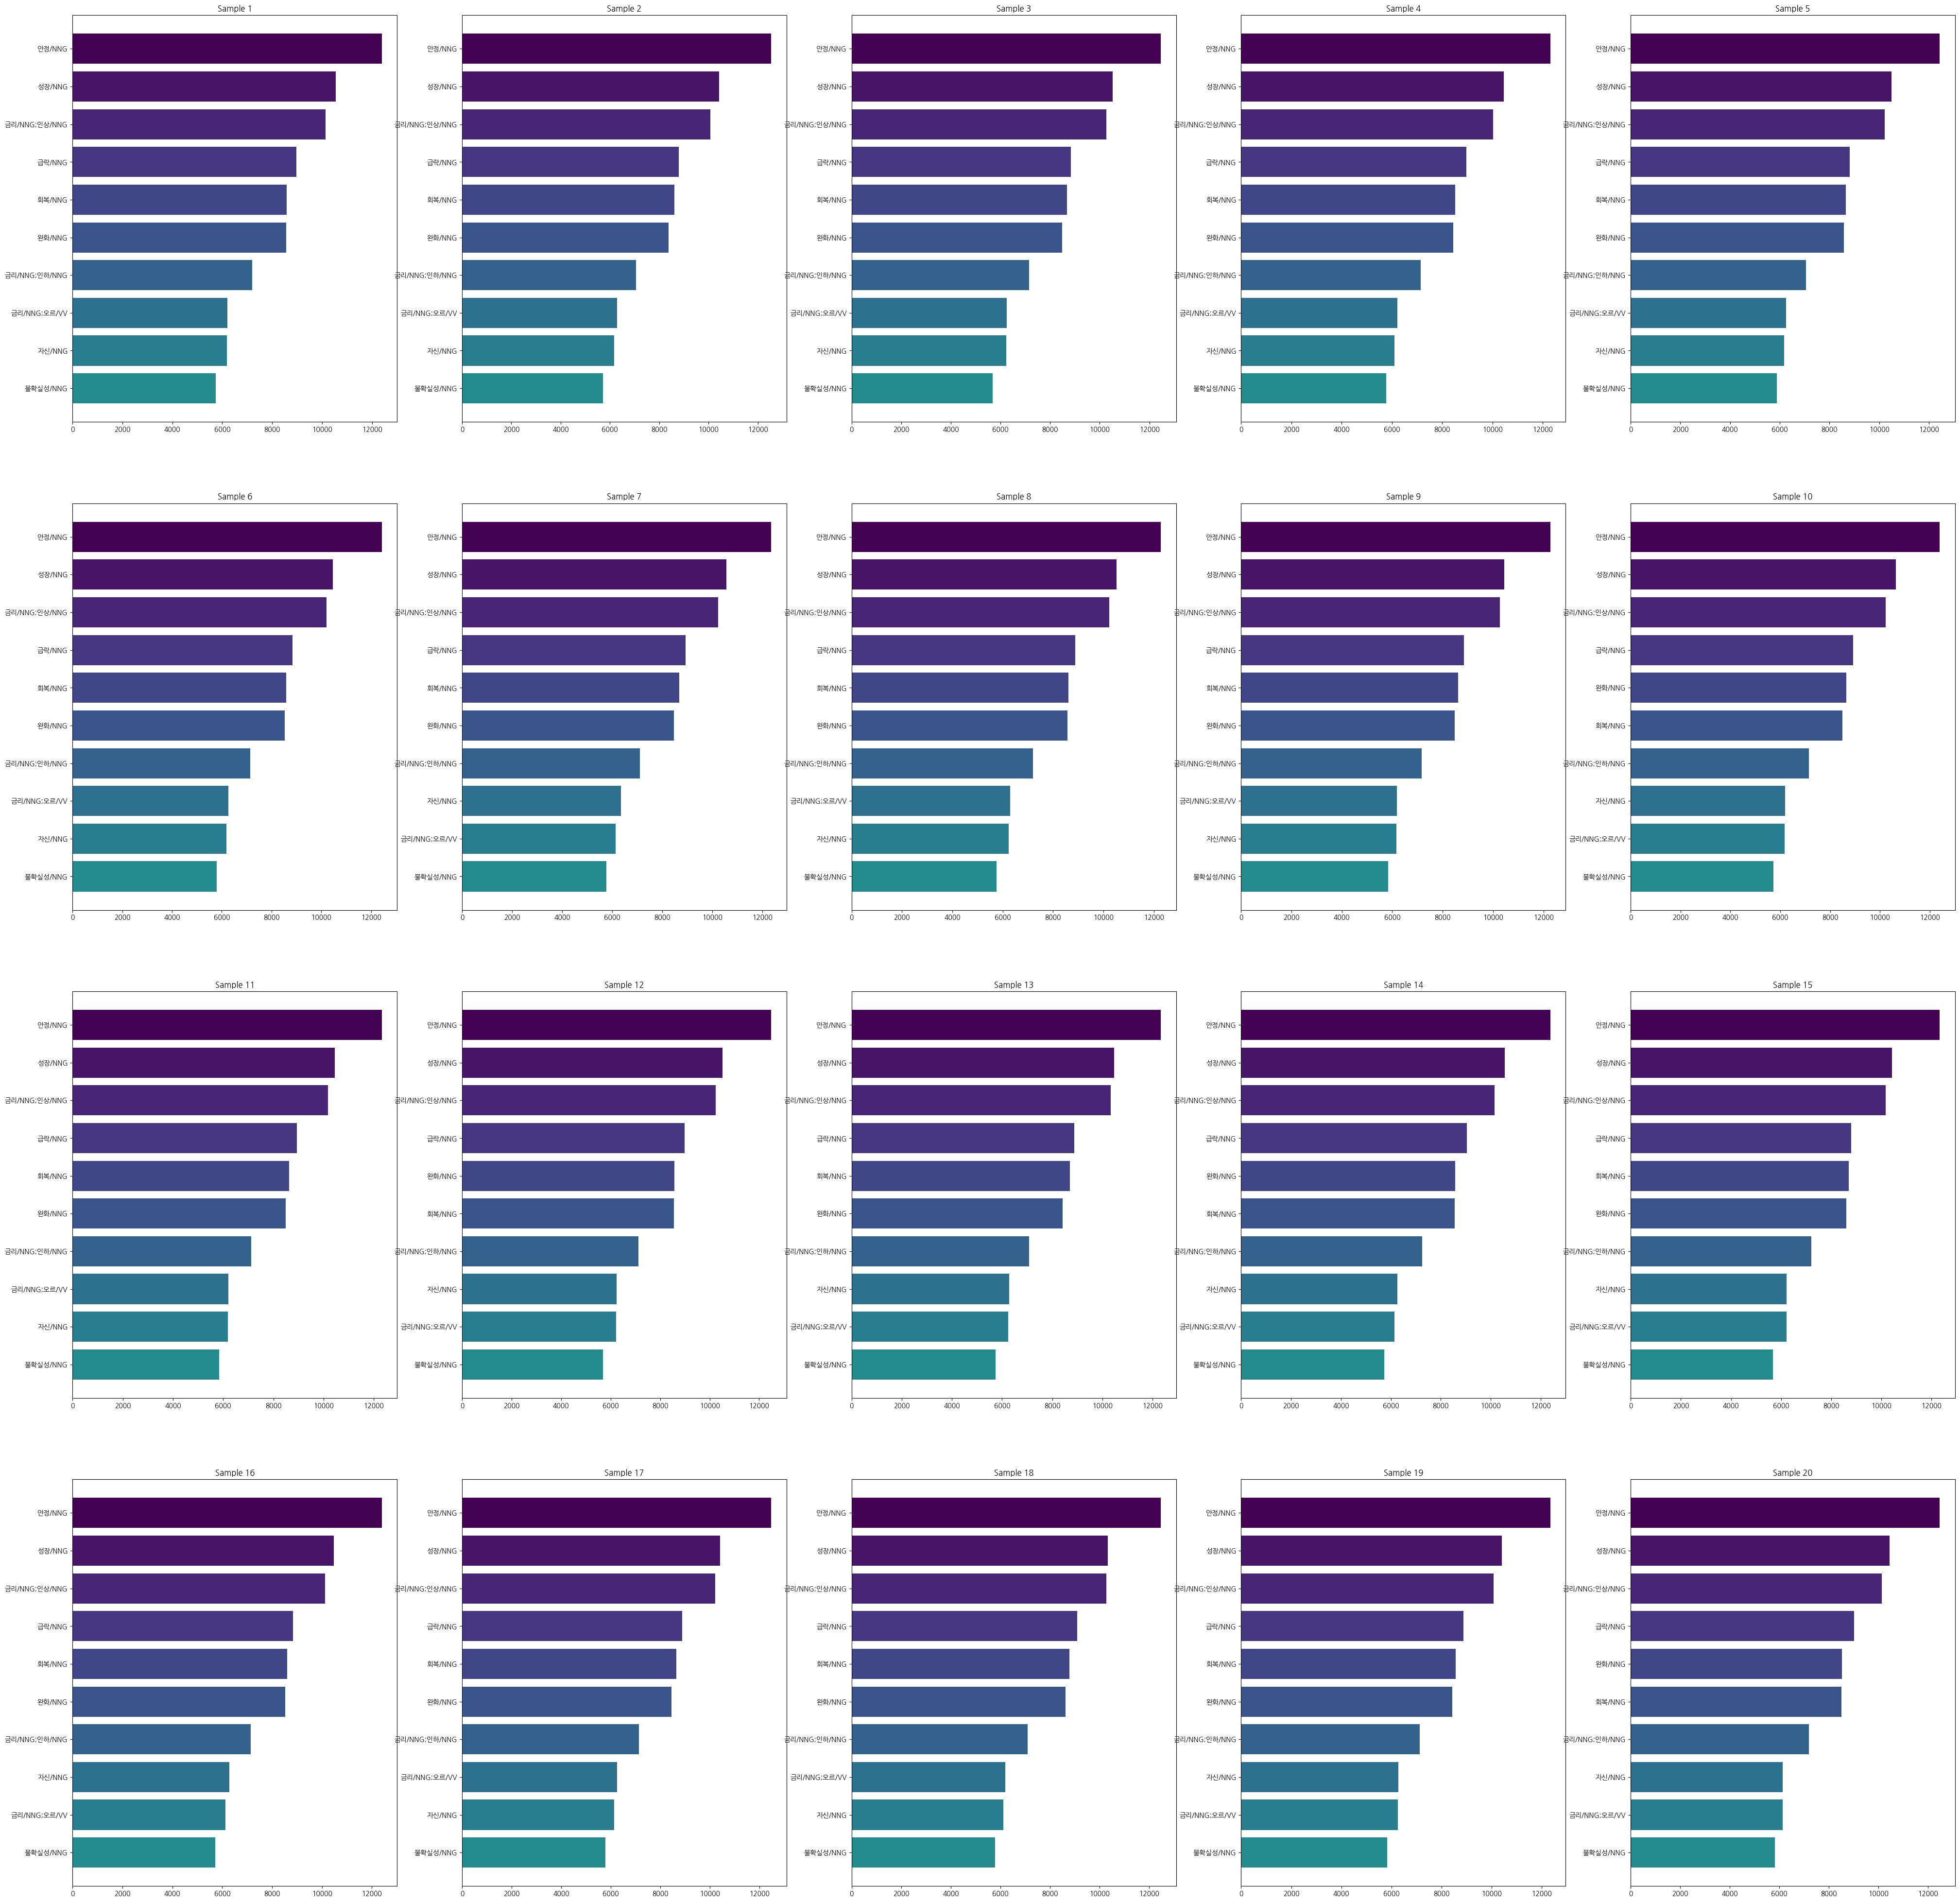

In [46]:
plt.figure(figsize=(50, 50))

cmap = plt.get_cmap('viridis')

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.rcParams['font.family'] ='NanumGothic'
    plt.rcParams['axes.unicode_minus'] =False
    colors = cmap(np.linspace(0, 1, 20))
    plt.barh(tn_top10[i].token, tn_top10[i].fre_sum, color=colors)
    plt.gca().invert_yaxis()
    plt.title(f'Sample {i+1}')

plt.show()

In [51]:
mpc_token = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/mpc_token.csv", index_col=0)

In [54]:
mpc_token

,date,content,content_token
0,20050609,회의경과\n〈의안 제21호 ― 통화정책방향〉\n(１) 전일 개최된 동향보고회의에서 ...,"['소비자/NNG;물가/NNG;근원/NNG;인플레이션/NNG;안정/NNG', 'fe..."
1,20050623,회의경과\n〈의안 제23호 ― 2005년 3/4분기 한국은행 총액한도대출의 한도 결...,"['총액/NNG;한도/NNG;대출/NNG;늘/VV', '금융시장/NNG;안정/NNG..."
2,20050707,회의경과\n〈의안 제25호 ― 통화정책방향〉\n(１) 전일 개최된 동향보고회의에서 ...,"['소비자/NNG;물가/NNG;근원/NNG;인플레이션/NNG;안정/NNG', '부동..."
3,20050811,회의경과\n〈의안 제31호 ― 통화정책방향〉\n(１) 전일 개최된 동향보고회의에서 ...,"['소비자/NNG;물가/NNG;근원/NNG;인플레이션/NNG;안정/NNG', '부동..."
4,20050908,회의경과\n〈의안 제32호 ― 통화정책방향〉\n(１) 전일 개최된 동향보고회의에서 ...,"['금리/NNG;인상/NNG;장기/NNG;금리/NNG;상승/NNG', '인상/NNG..."
...,...,...,...
385,20240523,회의경과\n가. 의결안건\n〈의안제16호― 통화정책방향〉\n( 1 ) 전일개최된동향...,"['소비/NNG;지출/NNG;pce/NNG;물가/NNG;상승/NNG', 'fed/N..."
386,20240613,회의경과\n가. 의결안건\n<의안제17호- ｢한국은행의금융기관대출규정｣개정(안)>\...,"['가계/NNG;부채/NNG;질적/VAX;구조/NNG;개선/NNG', '커버드본드/..."
387,20240626,회의경과\n가. 의결안건\n<의안제19호- ｢금융안정보고서(2024년6월)｣(안)>...,"['부동산/NNG;주택가격/NNG;하락/NNG', '부동산/NNG;pf/NNG;위험..."
388,20240711,회의경과\n가. 의결안건\n〈의안제21호― 통화정책방향〉\n( 1 ) 전일개최된동향...,"['하방/NNG;위험/NNG;물가/NNG;상방/NNG;위험/NNG', '금리/NNG..."


In [53]:
mpc_token.content_token[0]

"['소비자/NNG;물가/NNG;근원/NNG;인플레이션/NNG;안정/NNG', 'fed/NNG;금리/NNG;인상/NNG;금리/NNG;인하/NNG', '중소기업/NNG;대출/NNG;연체율/NNG;상승/NNG', '소비자/NNG;물가/NNG;상승률/NNG;둔화/NNG', '외국인/NNG;직접/MAG;투자/NNG;감소/NNG', '금리/NNG;fed/NNG;금리/NNG;인상/NNG', 'fed/NNG;금리/NNG;인상/NNG;상승/NNG', '세계/NNG;경제/NNG;견조/NNG;성장/NNG', '공공/NNG;주택/NNG;공급/NNG;확대/NNG', '호조/NNG;산업/NNG;생산/NNG;증가/NNG', '경기/NNG;체감/NNG;지수/NNG;하락/NNG', '가계/NNG;소비/NNG;지출/NNG;증가/NNG', '안정/NNG;경기/NNG;둔화/NNG;우려/NNG', '둔화/NNG;우려/NNG;완화/NNG;상승/NNG', '경상/NNG;수지/NNG;흑자/NNG;축소/NNG', '해외/NNG;증권/NNG;투자/NNG;증가/NNG', '지수/NNG;경제/NNG;지표/NNG;호조/NNG', '금리/NNG;시장/NNG;금리/NNG;하락/NNG', '가격/NNG;상승/NNG;가능성/NNG;높/VA', '미/NNG;국채/NNG;수요/NNG;증가/NNG', '기업/NNG;자금/NNG;수요/NNG;줄/VV', '설비/NNG;투자/NNG;개선/NNG;않/VX', '금융시장/NNG;불확실성/NNG;증대/NNG', '금융시장/NNG;안전자산/NNG;선호/NNG', '주택담보대출/NNG;금리/NNG;인하/NNG', '쉽/VA;않/VX;금리/NNG;인하/NNG', '금융시장/NNG;경기/NNG;회복/NNG', '주택가격/NNG;하락/NNG;부실/NNG', 'gdp/NNG;성장률/NNG;확대/NNG', '소매/NNG;판매가격/NNG;감소/NNG', '제조업/NNG;가동률/NNG;하락/NNG', '은행/NNG;주택담보대출/NNG;늘/VV', '장기물/NNG;수익률/NNG;하락/NNG', '부

In [77]:
df_token

,date,content,rate_change
0,20050609,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",0
1,20050609,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",0
2,20050609,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",0
3,20050609,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",0
4,20050609,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",0
...,...,...,...
359754,20240711,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",0
359755,20240711,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",0
359756,20240711,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",0
359757,20240711,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",0


In [81]:
# content_token_fin = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/content_token_fin.csv", index_col=0)

In [94]:
df_token.content[0][1:-1].split(",")[1][1:-1]

"'가격/NNG;상승/NNG;우호적/VAX"

In [82]:
content_token_fin

,date,content,category,rate_change,content_token
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V..."
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']"
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N..."
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN..."
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성..."
...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N..."
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']"
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG..."
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG..."


In [95]:
token_dict = {}
tokens_list = []

# content_token_fin.content_token

for i in range(len(df_token.content)):
    tokens = ""
    content = df_token.content[i]
    content = content[1:-1]

    for j in range(len(content.split(","))):
        sub_content = content.split(",")[j]
        first_index = sub_content.find("'")
        word_len = len(sub_content[first_index:-1].split(";"))
        for k in range(word_len):
            
            token = sub_content[first_index+1:-1].split(";")[k][:sub_content[first_index+1:-1].split(";")[k].find('/')]
            
            if tokens == "":
                tokens += token
            else:
                tokens += " "+token
    
    tokens_list.append(tokens)

In [97]:
len(tokens_list)

359759

In [98]:
content_token_fin["tokens_list"] = tokens_list

In [ ]:
content_token_fin.to_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/content_token_fin2.csv")

-------------------------------------------------------------------------------

In [2]:
content_token_fin = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/content_token_fin2.csv", index_col=0)
content_token_fin

,date,content,category,rate_change,content_token,tokens_list
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",부동산 가격 상승 가격 상승 우호적 가격 급등 완화
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",ecb 금리 인하 경제 살
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",fed 금리 인상 경고 fed 장기 금리 하락 금리 역전 경기 둔화 둔화 장기 금리...
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",인상 장기 금리 인상 국채 수익률 급등 부동산 거품 우려 과열 금리 오르 경기 둔화...
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",경제 성장 저해 않 금리 경제 성장 물가 상승 억제 금리 인상 멈추 전망 밝 않 상...
...,...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",소비자 물가 상승률 하락 지표 발표 금리 인하 금리 인하 가능성 낮 금리 인하 가능...
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",중견 기업 성장 성장 크
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",금리 인하 전망 금리 인하 금리 인하 금리 인하 금리 인하 경기 침체 물가 상승률 ...
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",금리 인하 예상 인하 역외 환율 반영 오르 불확실성 하락 금리 하향 하회


In [3]:
# 기준금리 발표일 list
announce_dates_raw = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/기준금리test.csv", encoding='euc-kr')
announce_date_list = list(announce_dates_raw.announce_date[4:-3])
ann_date_list = []
for announce_date in announce_date_list:
    announce_date = int(announce_date.replace("-",""))
    ann_date_list.append(announce_date)

ann_date_list

[20050609,
 20050707,
 20050811,
 20050908,
 20051011,
 20051110,
 20051208,
 20060112,
 20060209,
 20060309,
 20060407,
 20060511,
 20060608,
 20060707,
 20060810,
 20060907,
 20061012,
 20061109,
 20061207,
 20070111,
 20070208,
 20070308,
 20070412,
 20070510,
 20070608,
 20070712,
 20070809,
 20070907,
 20071011,
 20071108,
 20071207,
 20080110,
 20080213,
 20080307,
 20080410,
 20080508,
 20080612,
 20080710,
 20080807,
 20080911,
 20081009,
 20081027,
 20081107,
 20081211,
 20090109,
 20090212,
 20090312,
 20090409,
 20090512,
 20090611,
 20090709,
 20090811,
 20090910,
 20091009,
 20091112,
 20091210,
 20100108,
 20100211,
 20100311,
 20100409,
 20100512,
 20100610,
 20100709,
 20100812,
 20100909,
 20101014,
 20101116,
 20101209,
 20110113,
 20110211,
 20110310,
 20110412,
 20110513,
 20110610,
 20110714,
 20110811,
 20110908,
 20111013,
 20111111,
 20111208,
 20120113,
 20120209,
 20120308,
 20120413,
 20120510,
 20120608,
 20120712,
 20120809,
 20120913,
 20121011,
 20121109,

In [4]:
# announce date 별 극성 (20050609 ~ 20240711 / 0:변화x, 1:상승, 2:하락 (콜금리 기준))
polarity = '''
0
0
0
0
0
2
1
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
2
1
0
0
0
0
2
1
1
2
1
0
2
1
0
0
0
0
0
0
1
0
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
2
0
2
0
0
0
0
2
2
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
1
0
0
1
0
0
0
1
2
1
2
0
0
'''

In [5]:
# announce_date별 극성
x = ''.join(polarity.split('\n'))
polarity_list = [int(i) for i in x]
polarity_list = polarity_list[4:]
announce_date_polarity = pd.DataFrame(polarity_list, index=ann_date_list)
announce_date_polarity.rename(columns={0:'polarity'}, inplace=True)

In [7]:
# 극성별 announce date 목록

def date_by_polarity(announce_date_polarity, n):
    pol = announce_date_polarity[announce_date_polarity.polarity==n]
    return list(pol.index)

pol_0 = date_by_polarity(announce_date_polarity,0)
pol_1 = date_by_polarity(announce_date_polarity,1)
pol_2 = date_by_polarity(announce_date_polarity,2)


In [8]:
pol_1

[20050811,
 20051011,
 20051208,
 20060209,
 20060608,
 20060810,
 20070111,
 20070712,
 20070809,
 20071011,
 20080110,
 20080807,
 20100709,
 20101116,
 20110113,
 20110310,
 20110610,
 20171130,
 20181130,
 20210715,
 20210826,
 20211125,
 20220114,
 20220526,
 20220713,
 20220825,
 20221012,
 20221124,
 20230113,
 20230525,
 20231130,
 20240222]

In [9]:
# 극성 pol 인 기간의 토큰들
def tok2list_bydate(content_token_fin, date_by_pol):
    t_list = []
    for date in date_by_pol:
        temp = content_token_fin[content_token_fin.date==date].content_token
        for i in temp:
            t_list.extend(eval(i))
    return t_list

In [10]:
t_list_0 = tok2list_bydate(content_token_fin, pol_0)
t_list_1 = tok2list_bydate(content_token_fin, pol_1)
t_list_2 = tok2list_bydate(content_token_fin, pol_2)

In [11]:
# 토큰 품사 제거처리 ex)'가격/NNG;상승/NNG' -> '가격 상승'
def token_list_ftn(t_list):

    token_list = []

    for t in t_list:
        token = t
        while token.find(';') > 0:
            token = token.replace(token[token.find('/'):token.find(';')+1], ' ')

        token = token.replace(token[token.find('/'):], '')

        token_list.append(token)

    return token_list

In [12]:
token_list_0 = token_list_ftn(t_list_0)
token_list_1 = token_list_ftn(t_list_1)
token_list_2 = token_list_ftn(t_list_2)

In [13]:
# 특정 극성인 기간의 토큰별 count list
def count_dict_ftn(token_list):

    unique_temp = list(set(token_list))
    count_dict = {i:0 for i in unique_temp}

    for token in token_list:
        count_dict[token] += 1

    return count_dict

In [14]:
count_dict_0 = count_dict_ftn(token_list_0)
count_dict_1 = count_dict_ftn(token_list_1)
count_dict_2 = count_dict_ftn(token_list_2)

In [15]:
# count_dict에 기록된 단어 빈도수에 따른 워드클라우드
def count_dict2wc(count_dict):
    wordcloud = WordCloud(width=1000, height=600, background_color='white', random_state=0,font_path='gulim').generate_from_frequencies(frequencies=count_dict)
    plt.rc('font', family='D2Coding')
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()

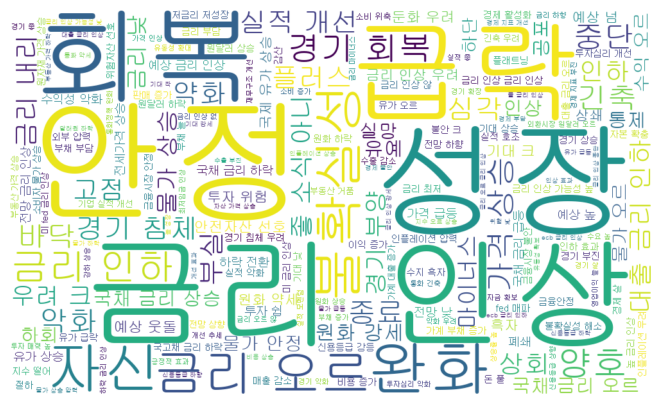

In [16]:
count_dict2wc(count_dict_0)

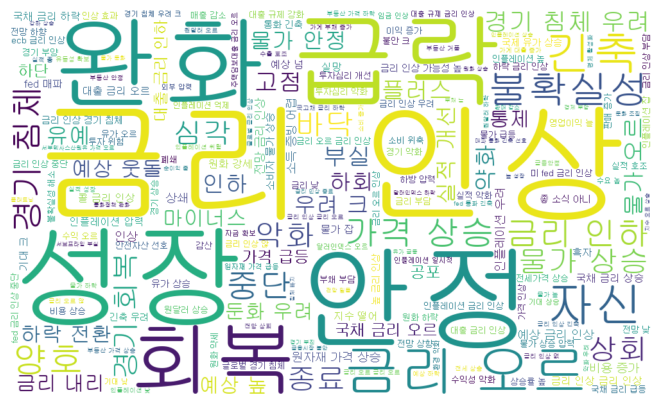

In [17]:
count_dict2wc(count_dict_1)

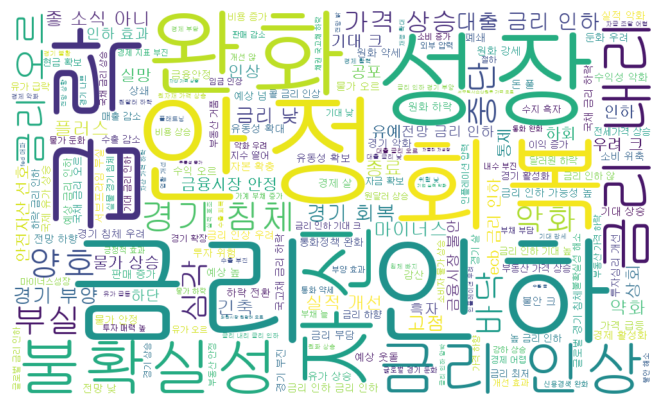

In [18]:
count_dict2wc(count_dict_2)

---

In [17]:
content_token_fin

,date,content,category,rate_change,content_token,tokens_list
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",부동산 가격 상승 가격 상승 우호적 가격 급등 완화
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",ecb 금리 인하 경제 살
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",fed 금리 인상 경고 fed 장기 금리 하락 금리 역전 경기 둔화 둔화 장기 금리...
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",인상 장기 금리 인상 국채 수익률 급등 부동산 거품 우려 과열 금리 오르 경기 둔화...
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",경제 성장 저해 않 금리 경제 성장 물가 상승 억제 금리 인상 멈추 전망 밝 않 상...
...,...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",소비자 물가 상승률 하락 지표 발표 금리 인하 금리 인하 가능성 낮 금리 인하 가능...
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",중견 기업 성장 성장 크
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",금리 인하 전망 금리 인하 금리 인하 금리 인하 금리 인하 경기 침체 물가 상승률 ...
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",금리 인하 예상 인하 역외 환율 반영 오르 불확실성 하락 금리 하향 하회


In [21]:
count_dict_0

{'전망 경제 성장 둔화': 33,
 '자산 건전성 수익성 저하': 1,
 '전망 fed 비둘기': 18,
 '국고채 축소': 21,
 '고점 인식 높': 3,
 '회복 정치 불확실성': 7,
 '가격 오르 하락': 116,
 '하락 압력 높': 80,
 '강경 금리 인상': 13,
 '지표 물가 안정': 26,
 '부진 임금 상승': 7,
 '중앙정부 재정 적자': 5,
 '원자재 가격 하향 안정': 11,
 '높 악재': 98,
 'irs 금리 인상': 12,
 '대출 공급 확대': 69,
 '이익 유보 자본 확충': 2,
 '투자 대기자금 증가': 7,
 '생산자 물가 하락 최대': 7,
 '심리 악화': 478,
 '금융시장 하락 압력': 1,
 'fed 디플레이션 위험': 7,
 '원화 급락': 420,
 '인플레이션 우려 긴축': 21,
 '민평 밑돌': 48,
 '글로벌 금융시장 강세': 14,
 '여전채 스프레드 확대': 23,
 '통화정책 방향 매파': 10,
 '재정위기 확산 않': 4,
 '금리 안전자산 선호 약화 상승': 2,
 '실물 타격': 13,
 '과도 높': 25,
 '원유 수요 둔화': 30,
 '국채시장 양적완화': 7,
 '자금부족 우려': 4,
 '신용등급 전망 안정 부정적 하향': 93,
 '최저 금리 하락': 54,
 '경제 예상 높': 16,
 '유가 하락 인플레이션 완화': 5,
 '경기 최대': 49,
 '원화 환율 높': 7,
 '고용자수 증가 늘': 20,
 '생산성 부진': 13,
 '채권 축소': 58,
 '높 금리 아니': 37,
 '국채 금리 경제 지표 부진': 4,
 '위기 발생 가능성 높': 10,
 '발행 수요 많': 32,
 '생산원가 상승': 15,
 '제조업 활동 둔화': 18,
 '내수 지표 호전': 5,
 '고용 지수 상승': 30,
 '거시 건전성 규제 강화': 22,
 '신흥국 경제 우려': 22,
 '지표 악화 경기 회복': 15,
 '전망 늦': 73,
 '자산 가격 급등': 171

In [18]:
# count_dict의 상위 N개 토큰 그래프
def topNgraph(count_dict, N):
    topNitems = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True)[:N])
    plt.figure(figsize=(100, 50))
    plt.bar(list(topNitems.keys()), list(topNitems.values()))
    plt.xticks(rotation=45)
    plt.xticks(fontsize=70)
    plt.yticks(fontsize=70)
    plt.show()

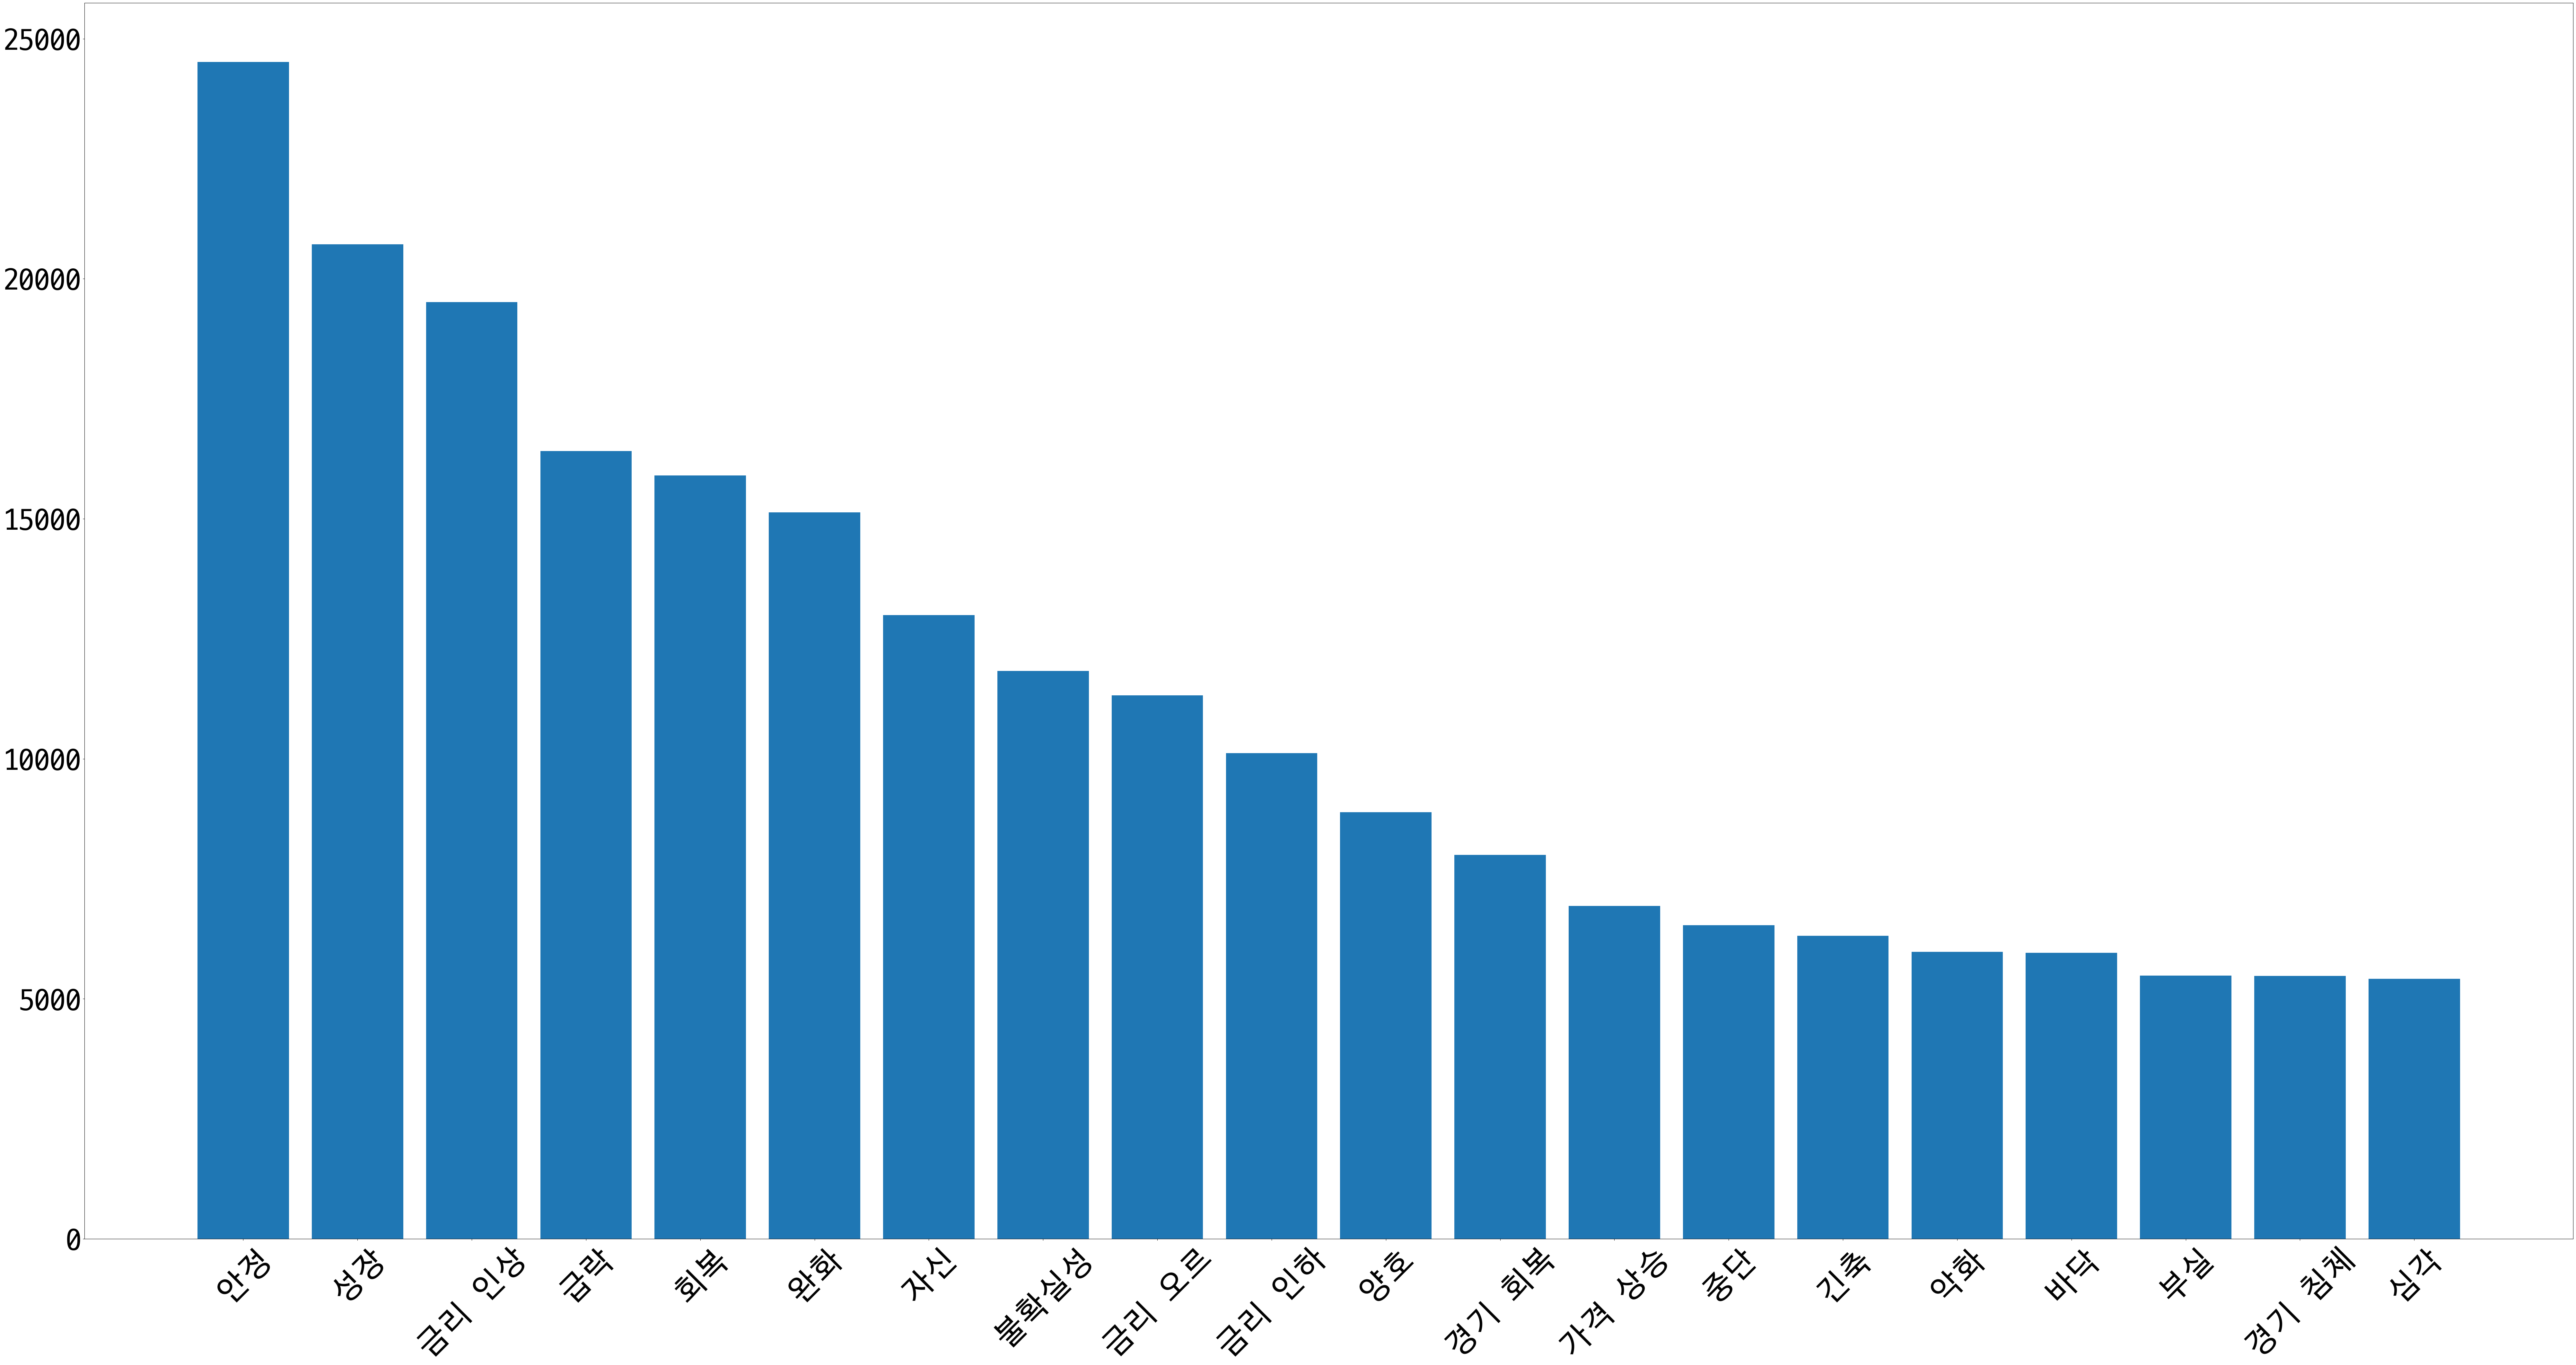

In [24]:
topNgraph(count_dict_0, 20)

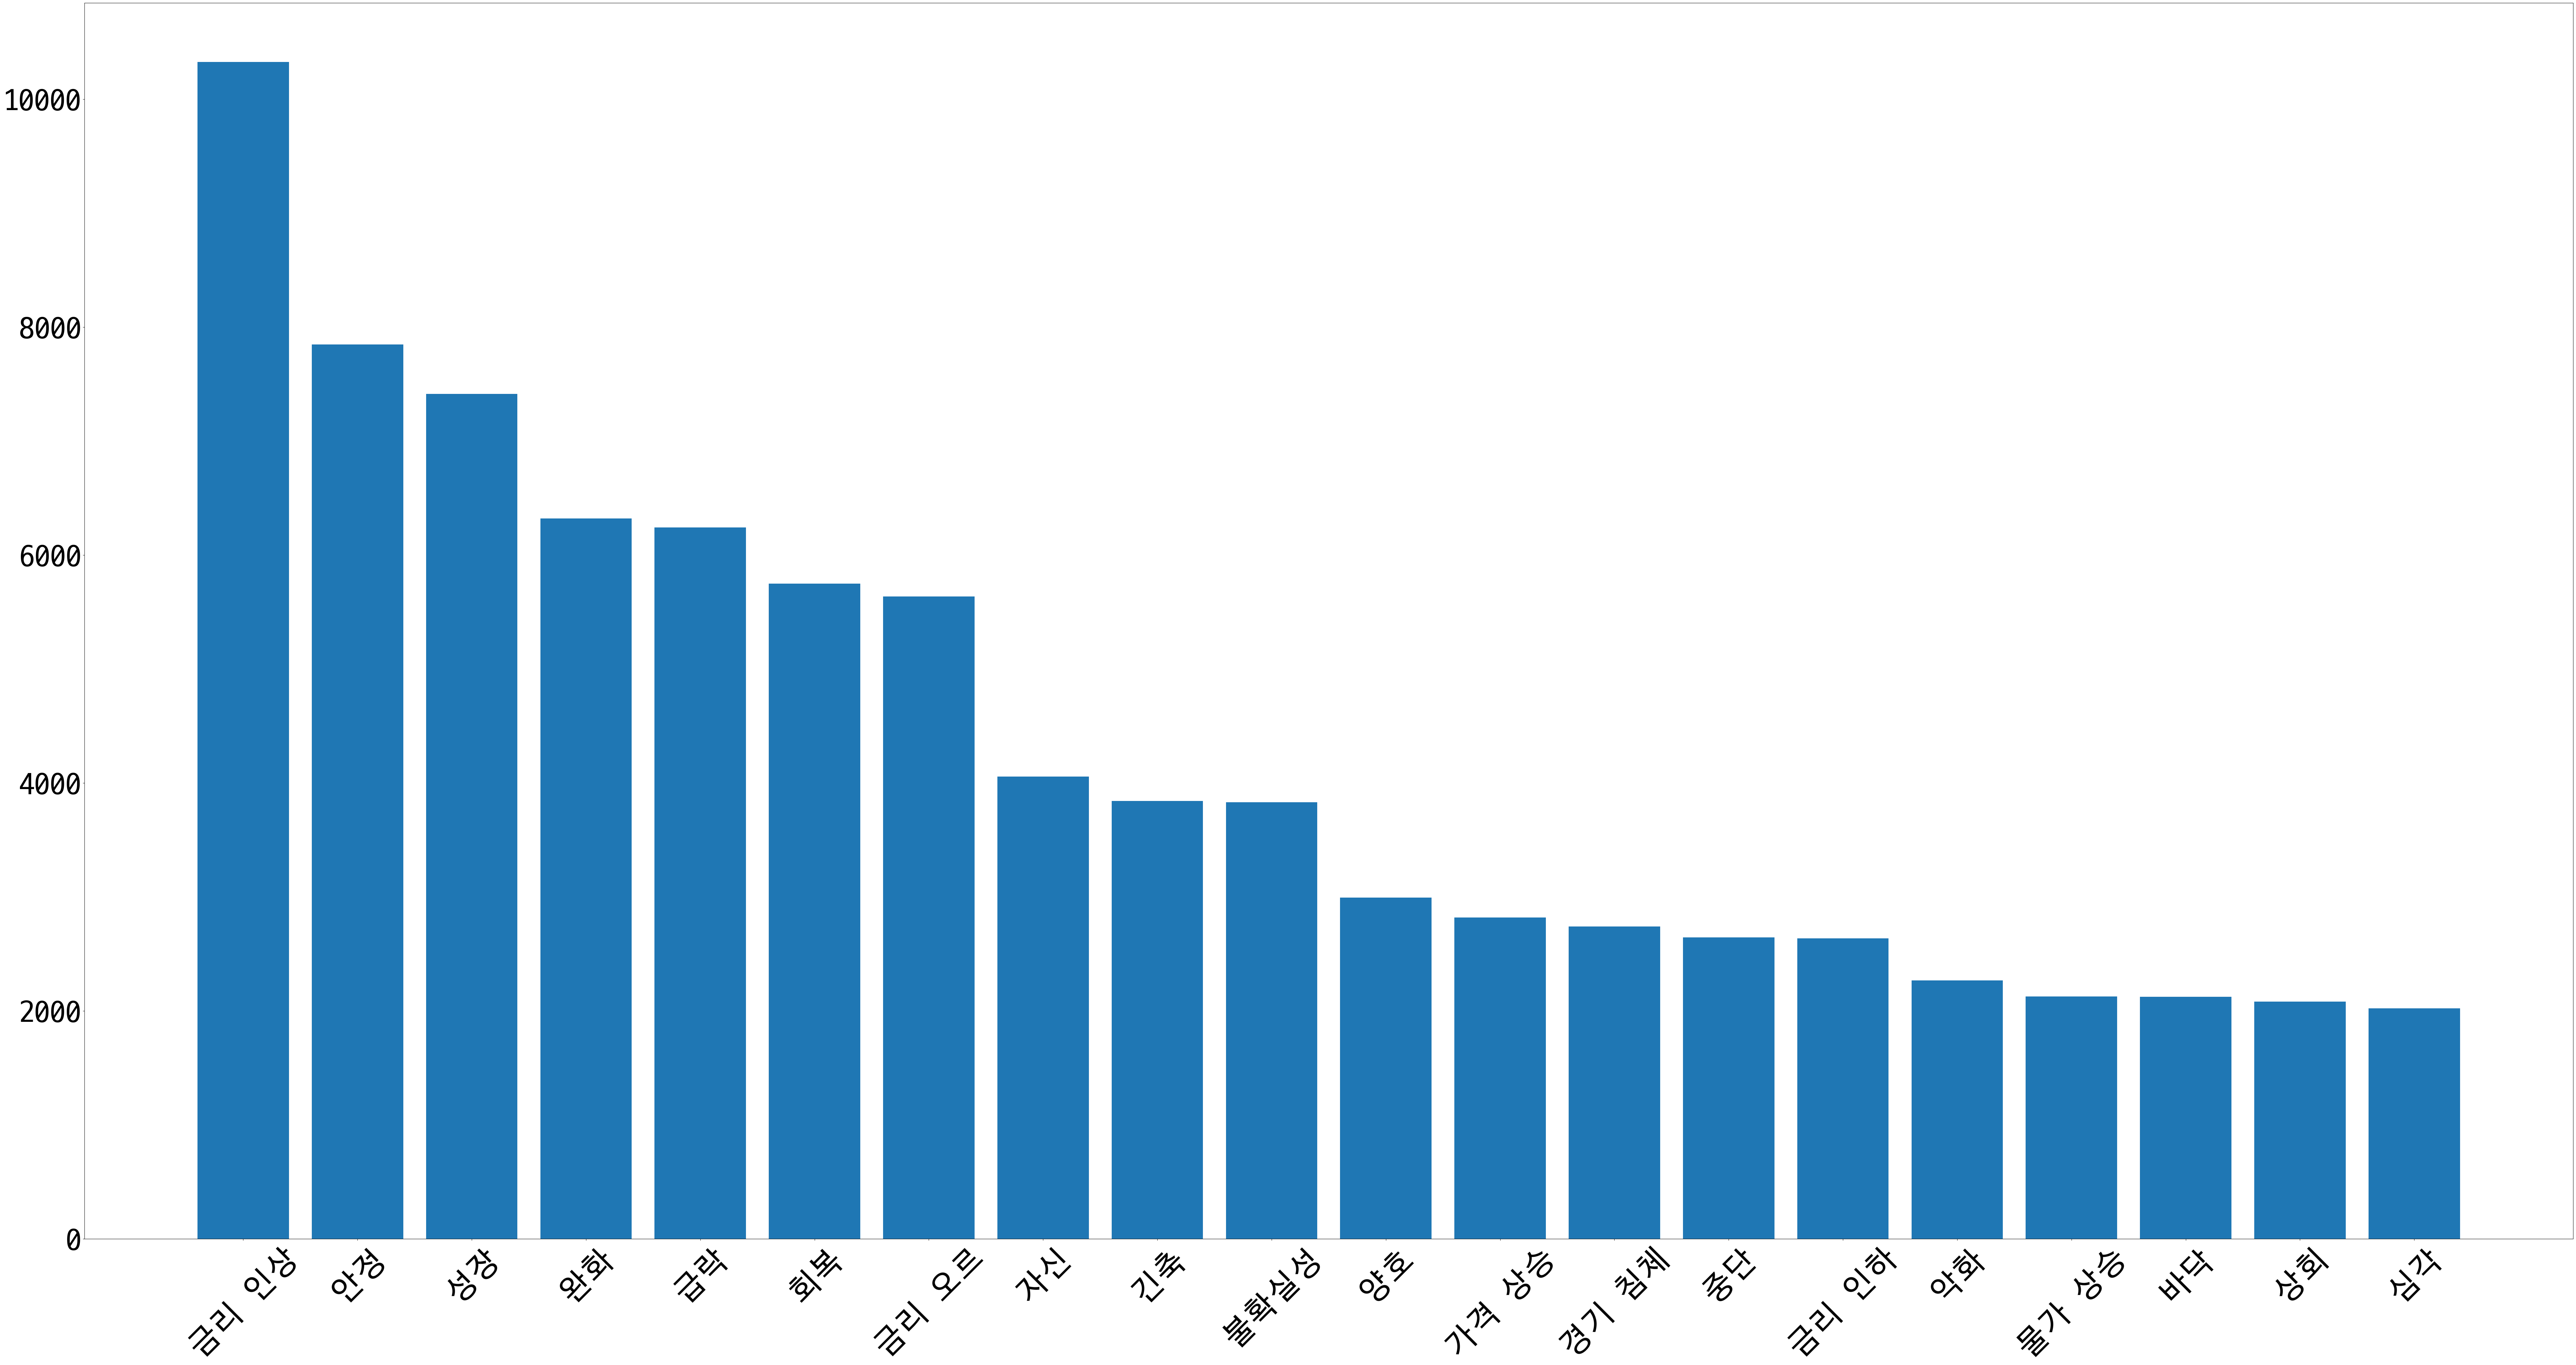

In [25]:
topNgraph(count_dict_1, 20)

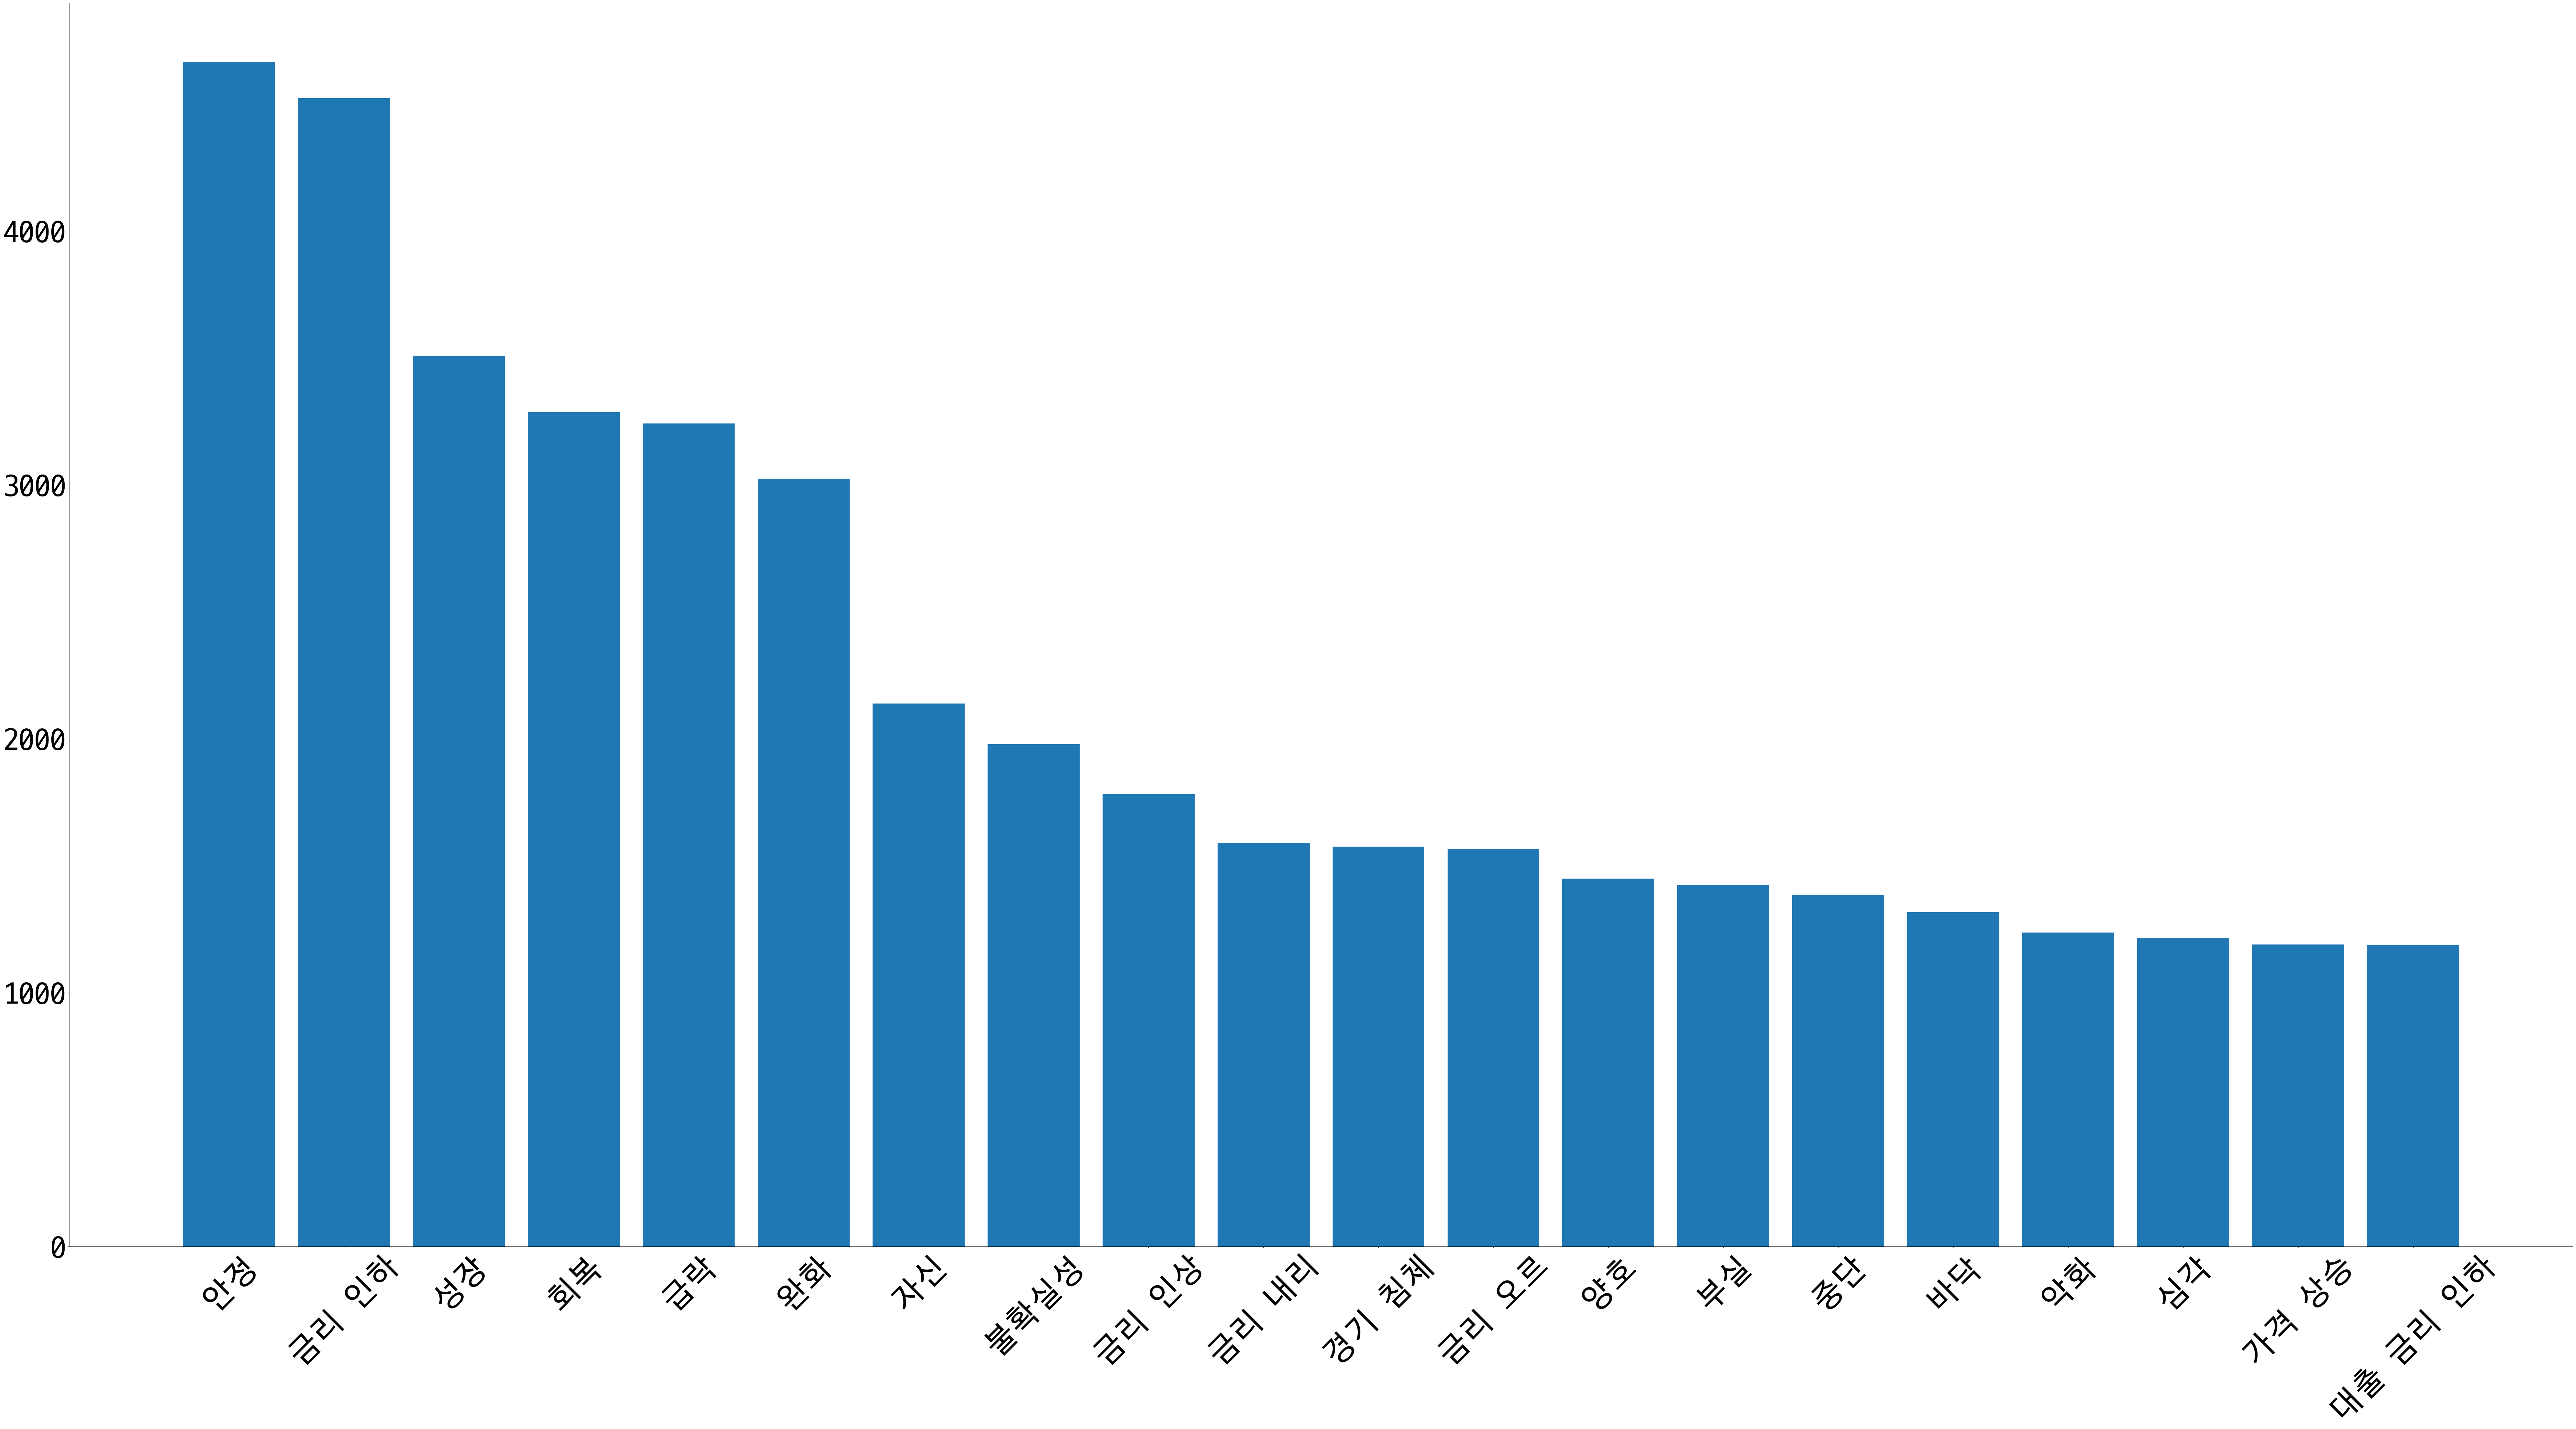

In [26]:
topNgraph(count_dict_2, 20)

---

In [19]:
content_token_fin

,date,content,category,rate_change,content_token,tokens_list
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",부동산 가격 상승 가격 상승 우호적 가격 급등 완화
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",ecb 금리 인하 경제 살
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",fed 금리 인상 경고 fed 장기 금리 하락 금리 역전 경기 둔화 둔화 장기 금리...
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",인상 장기 금리 인상 국채 수익률 급등 부동산 거품 우려 과열 금리 오르 경기 둔화...
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",경제 성장 저해 않 금리 경제 성장 물가 상승 억제 금리 인상 멈추 전망 밝 않 상...
...,...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",소비자 물가 상승률 하락 지표 발표 금리 인하 금리 인하 가능성 낮 금리 인하 가능...
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",중견 기업 성장 성장 크
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",금리 인하 전망 금리 인하 금리 인하 금리 인하 금리 인하 경기 침체 물가 상승률 ...
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",금리 인하 예상 인하 역외 환율 반영 오르 불확실성 하락 금리 하향 하회


<BarContainer object of 4 artists>

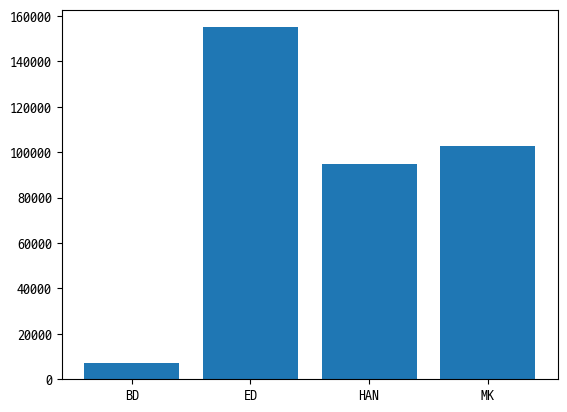

In [38]:
# category별 문서 수 (BD/ED/HAN/MK -> 채권분석보고서/이데일리/한경/매경)
grouped = content_token_fin.groupby('category')
result = grouped['content'].agg(['count'])
plt.bar(result.index, result['count'])

<Axes: xlabel='rate_change', ylabel='count'>

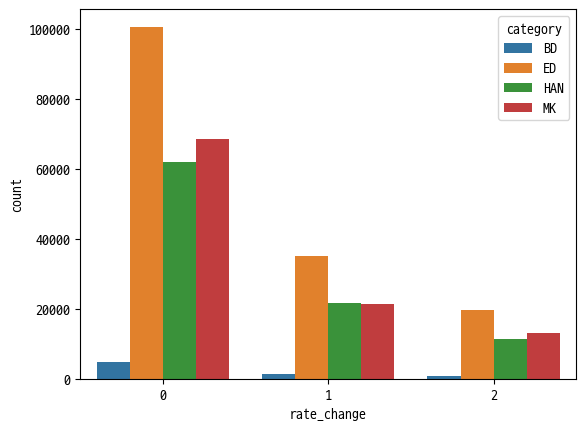

In [97]:
# 극성 및 category별 문서 수
grouped2 = content_token_fin.groupby(['category', 'rate_change'])
result2 = grouped2['rate_change'].agg(['count'])
result2

sns.barplot(data=result2, x='rate_change', y='count', hue='category')

In [25]:
print(len(pol_0), len(pol_1), len(pol_2))

144 32 26


In [136]:
# 단위 기간당 극성별 문서 수 
divisors = {0: len(pol_0), 1: len(pol_1), 2: len(pol_2)}
result3 = result2.copy()
for rate_change, divisor in divisors.items():
    result3.loc[(slice(None), rate_change), 'count'] /= divisor

result3

count
category rate_change             
BD       0              33.833333
         1              45.593750
         2              33.538462
ED       0             698.173611
         1            1093.468750
         2             750.346154
HAN      0             429.118056
         1             675.062500
         2             440.076923
MK       0             475.229167
         1             663.937500
         2             500.115385

<Axes: xlabel='rate_change', ylabel='count'>

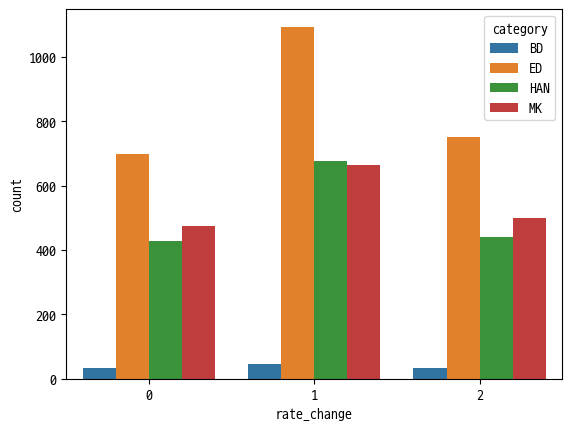

In [230]:
# 단위 기간당 극성별 문서 수 그래프(category별)
sns.barplot(data=result3, x='rate_change', y='count', hue='category')

<Axes: xlabel='rate_change', ylabel='count'>

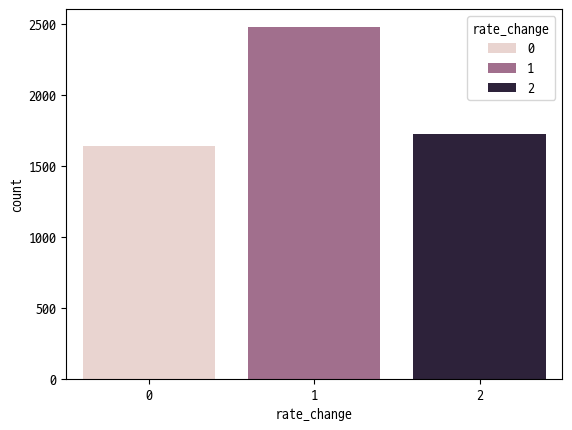

In [228]:
# 단위 기간당 극성별 문서 수(총합)
result3.groupby('rate_change').agg('sum')
sns.barplot(data=result3.groupby('rate_change').agg('sum'), x='rate_change', y='count', hue='rate_change')

In [231]:
# category별 문서당 평균 토큰 수
BD_len_list = []
for i in content_token_fin[content_token_fin['category']=='BD'].content_token:
    BD_len_list.append(len(eval(i)))

ED_len_list = []
for i in content_token_fin[content_token_fin['category']=='ED'].content_token:
    ED_len_list.append(len(eval(i)))

HAN_len_list = []
for i in content_token_fin[content_token_fin['category']=='HAN'].content_token:
    HAN_len_list.append(len(eval(i)))

MK_len_list = []
for i in content_token_fin[content_token_fin['category']=='MK'].content_token:
    MK_len_list.append(len(eval(i)))

a=sum(BD_len_list)/len(BD_len_list)
b=sum(ED_len_list) / len(ED_len_list)
c=sum(HAN_len_list)/len(HAN_len_list)
d=sum(MK_len_list)/len(MK_len_list)
a, b, c, d

(29.410939886158545, 8.395737791623935, 8.137963031306347, 7.241327593930777)

---

In [139]:
# 의사록 극성 분류
mpc_token = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/mpc_token.csv", index_col=0)
mpc_token.drop(index=389, inplace=True)

mpc_polarity_list = []

for date in mpc_token['date']:
    valid_dates = [ann_date for ann_date in ann_date_list if ann_date <= date]
    
    if valid_dates:
        max_valid_date = max(valid_dates)
        index = ann_date_list.index(max_valid_date)
        mpc_polarity_list.append(polarity_list[index])
    else:
        # Handle cases where no valid date is found
        mpc_polarity_list.append(None)

mpc_token['polarity'] = mpc_polarity_list
# mpc_token.to_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/mpc_token_polarity.csv")